In [40]:
#import libraries 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from scipy.integrate import solve_ivp
import math as math
from scipy import optimize

#define global variables
perm = 8.864187817 * 10**(-12) #permeativity constant
h = 6.62607015*10**(-34) #plank's constant
xf = 30
xt = 0.01
x_values = np.array([x for x in np.arange(0, xf, xt)]) #position values

In [41]:
# define properties of unstable atom

Z = 88
A = 226
#Q = energy release 
##mp = mass particle
#ma = mass atom
nucleusRadius = 1.25 * ((A - 4)**(1/3)) * 10**(-15)
print(nucleusRadius)
nucRad = nucleusRadius * 10**(15)
print(nucRad)


7.568811183138881e-15
7.568811183138881


In [42]:
# define potential equation modeled by a deep square well and then a boundary 
# defined by the coulomb reulsive force

def potential(V_0, Z, nucRad) :
    
    y_values = [0]*len(x_values)
    for i in range(len(x_values)) :
        if x_values[i] < nucRad :
            y_values[i] = V_0
        else :
            y_values[i] = (1/(4 * np.pi * perm)) * ((2 * np.e**2 * (Z - 2))/ (x_values[i])) 
    return y_values


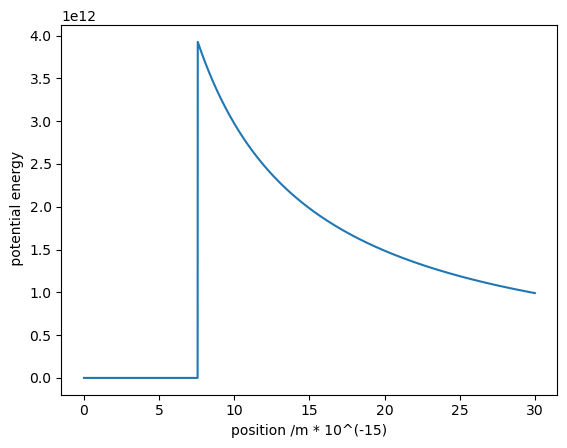

In [44]:
# plot the potential 

def show_plot():
    plt.title('')
    plt.xlabel('position /m * 10^(-15)')
    plt.ylabel(' potential energy')
    plt.show()

plot = plt.plot(x_values, (potential(0, 226, nucRad)))
show_plot()

In [52]:


# define potential equation modeled by a deep square well and then a boundary 
# defined by the coulomb reulsive force
import numpy as np
from scipy import constants as const
from scipy import sparse as sparse
from scipy.sparse.linalg import eigs
from matplotlib import pyplot as plt
Z = 86
A = 212
r = 1.2 * ((4)**(1/3) + A**(1/3)) # nuclear separation #fm
def potential(x) :
    if x < r :
        return 0
    else :
        return ((2 * 1.44 * (Z - 2))/ (x)) 

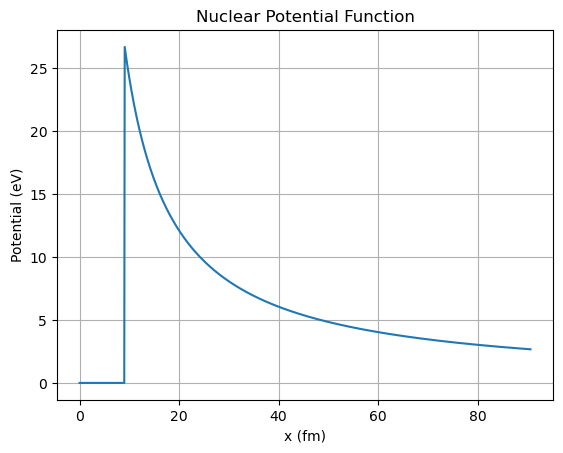

In [98]:
# Define range of x values
x_values = np.linspace(0, 10 * r, 1000)  # Adjust range and number of points as needed

# Evaluate the potential function at each x value
potential_values = [potential(x) for x in x_values]

# Plot the potential function
plt.plot(x_values, potential_values)
plt.xlabel('x (fm)')
plt.ylabel('Potential (eV)')
plt.title('Nuclear Potential Function')
plt.grid(True)
plt.show()

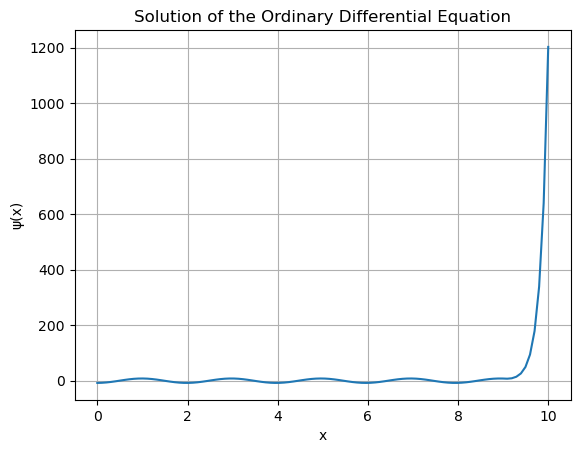

In [97]:

from typing import Callable
import scipy.integrate as integrate
import math

hbar = 1
m = 1

def solve_ode(V: Callable[[float], float], E: float, x0: float, xf: float, y0: float, dy0: float) -> Callable[[float], float]:
	"""Solve the TISE system of first-order ODEs.
	Parameters:
		V: The potential function V(x)
		E: The specified energy level
		x0: Start x
		xf: Final x
		y0: Value of ψ(x0)
		dy0: Value of ψ'(x0)
	"""
	# Create the ODE system
	f = lambda x, y: [y[1], -((2*m)/(math.pow(hbar, 2)))*(E - V(x))*y[0]]

	# Solve the ODE system
	solution = integrate.solve_ivp(f, [x0, xf], [y0, dy0], dense_output=True)

	if (not solution.success):
		print (f'Integration Failed, status={solution.status}')
		print ("\t" + solution.message)

	# Return the function containing its values.
	psi = lambda x: solution.sol(x)[0]

	return psi


solve_ode_lambda = solve_ode(potential, 5, -1, 10, 8,0)

# Define the range of x values for plotting
x_values = np.linspace(0, 10, 100)  # Adjust start_x, end_x, num_points as needed

# Evaluate the lambda function at each x value to obtain y values
y_values = [solve_ode_lambda(x) for x in x_values]

# Plot the solution
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('ψ(x)')
plt.title('Solution of the Ordinary Differential Equation')
plt.grid(True)
plt.show()

In [20]:
y0 = 9
g = 9.8
tf= 10

def f(t, r):
    y, v = r
    dy_dt = v
    dv_dt = -g
    return dy_dt, dv_dt


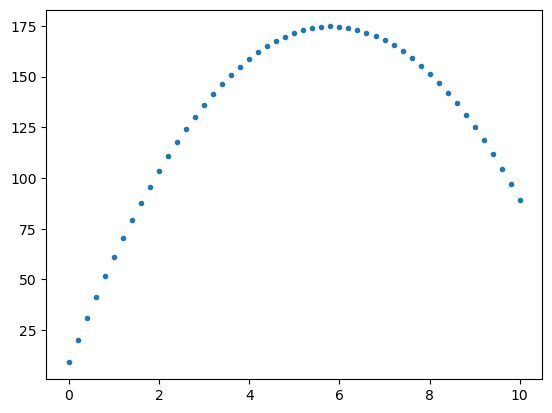

In [36]:
v0 = 57 #guess
t = np.linspace(0, tf, 51)
sol = solve_ivp(f, (0,tf), (y0, v0), t_eval=t)
y, v = sol.y
plt.plot(t, y, ".")
plt.show()

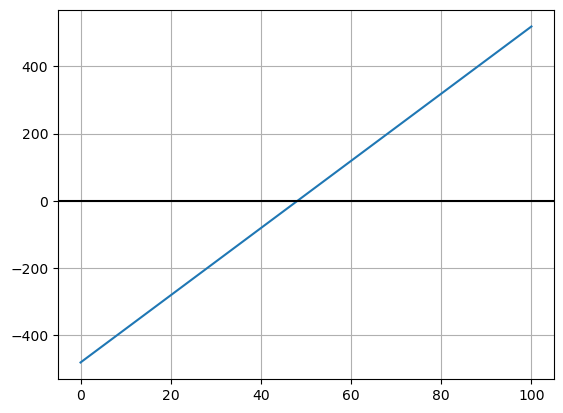

In [26]:
@np.vectorize
def yf(v0):
    sol = solve_ivp(f, (0, tf), (y0, v0))
    y, v = sol.y
    return y[-1]

v0 = np.linspace(0, 100, 100)

plt.plot(v0, yf(v0))
plt.grid()
plt.axhline(c = "k")
plt.show()

In [33]:
# use secant method

v0 = optimize.newton(yf, 50)
print(v0)


48.09999999999995


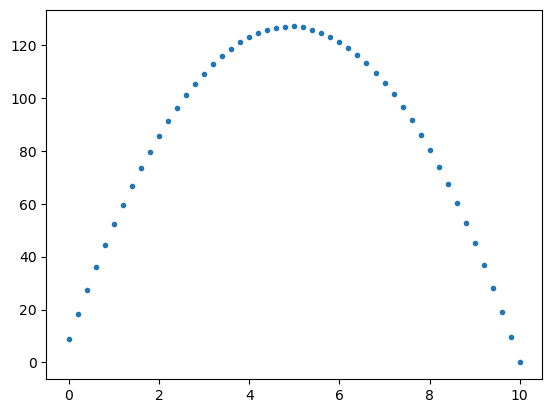

In [34]:
# use v0 to plot the actual solution
t = np.linspace(0, tf, 51)
sol = solve_ivp(f, (0,tf), (y0, v0), t_eval=t)
y, v = sol.y
plt.plot(t, y, ".")
plt.show()